# Kmeans Algorithm with 5 random initialization & Error plot

In [30]:
#importing necessary libraries
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sys
import csv
import random
import math
import matplotlib.pyplot as plt
import time

from sklearn.datasets import make_blobs
n_clusters = 4
n_samples=1000
n_features = 2

#from sklearn.datasets import make_moons
from scipy.spatial.distance import pdist, squareform
import sklearn.metrics.pairwise

filename = 'Dataset.csv'
raw_data = open(filename, 'rt')
reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
x = list(reader)
data = np.array(x).astype('float')
X = data

#Samples and featurees
n_samples = X.shape[0]  #gives 1000


In [31]:
#from sklearn.datasets import make_moons
from scipy.spatial.distance import pdist, squareform
import sklearn.metrics.pairwise

filename = 'Dataset.csv'
raw_data = open(filename, 'rt')
reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
x = list(reader)
data = np.array(x).astype('float')
X = data

In [32]:
def centroid_initialization(X , n_clusters, seed_val):
    centroids = np.zeros((n_clusters, n_features))
    
    for i in range(n_clusters):
        #initial assignment (random)
        random.seed(seed_val+i)
        #centroid_current_cluster = X[np.random.choice(range(n_samples))]
        centroid_current_cluster = X[random.randint(1, 1000)]
        centroids[i] = centroid_current_cluster

    return centroids

In [33]:
def cluster_assignment(X, centroids , n_clusters):
    current_clusters = [[] for i in range(n_clusters)]

    for index, data_point in enumerate(X):
        nearest_centroid = np.argmin(
            np.sqrt(np.sum((data_point - centroids) ** 2, axis=1))
        )
        current_clusters[nearest_centroid].append(index)

    return current_clusters

In [34]:
def calculate_error(X, centroids , n_clusters, y):
    dist = 0
    for index, data_point in enumerate(X):
        nearest_centroid = np.argmin(
            np.sqrt(np.sum((data_point - centroids) ** 2, axis=1))
        )
        dist += np.linalg.norm(data_point - centroids[nearest_centroid])
    y = np.append(y, dist)
    return y

In [35]:
def update_centroids(X, current_clusters, n_clusters):
    centroids = np.zeros((n_clusters, n_features))
    for index, cluster in enumerate(current_clusters):
        new_centroid = np.mean(X[cluster], axis=0)
        centroids[index] = new_centroid
    return centroids

K-Means Converged
K-Means Converged
K-Means Converged
K-Means Converged
K-Means Converged


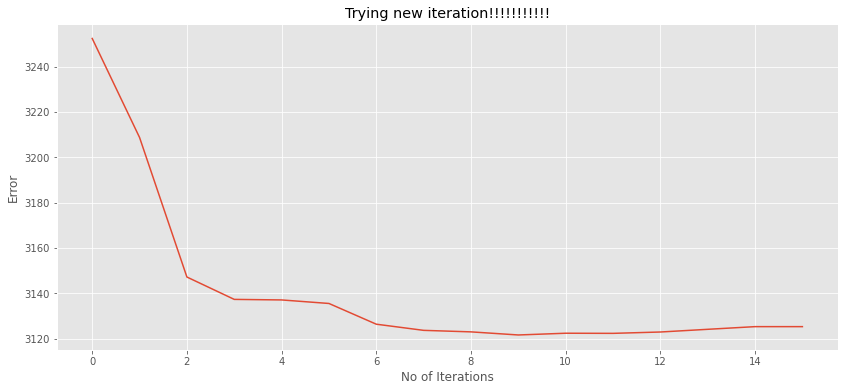

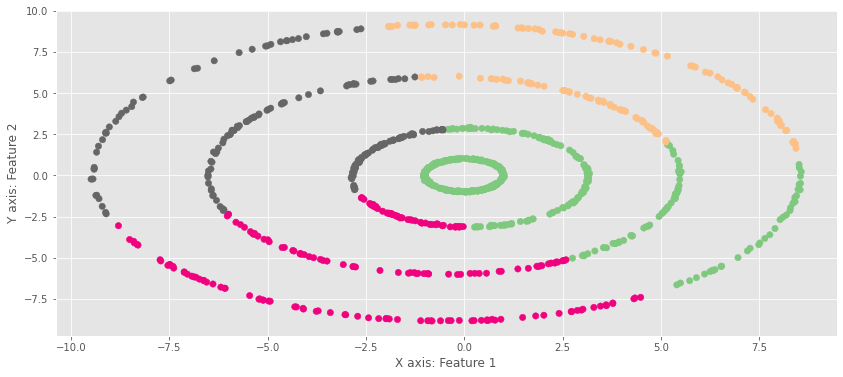

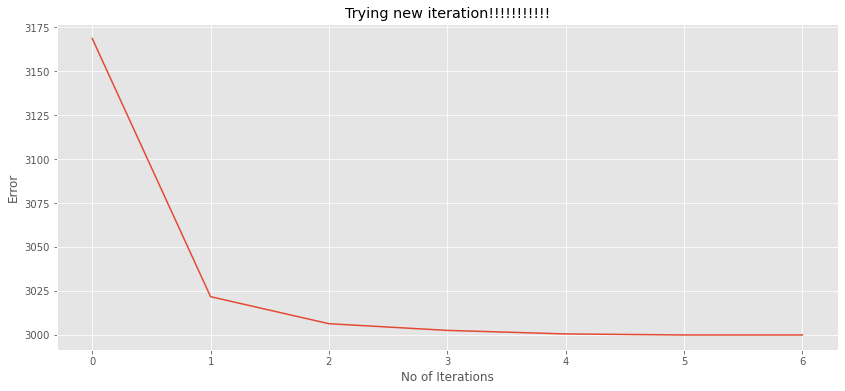

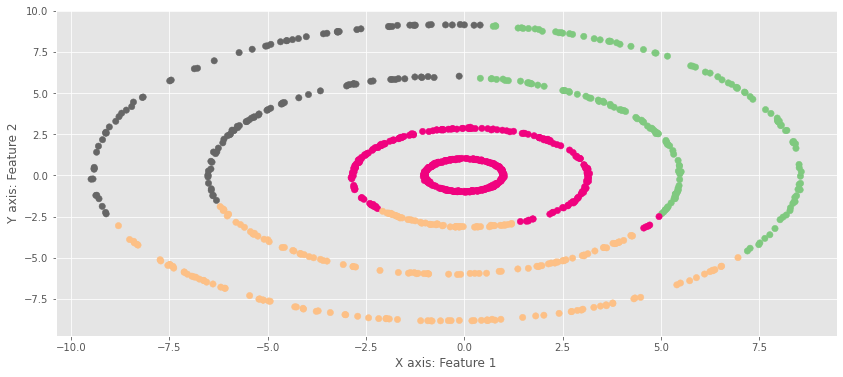

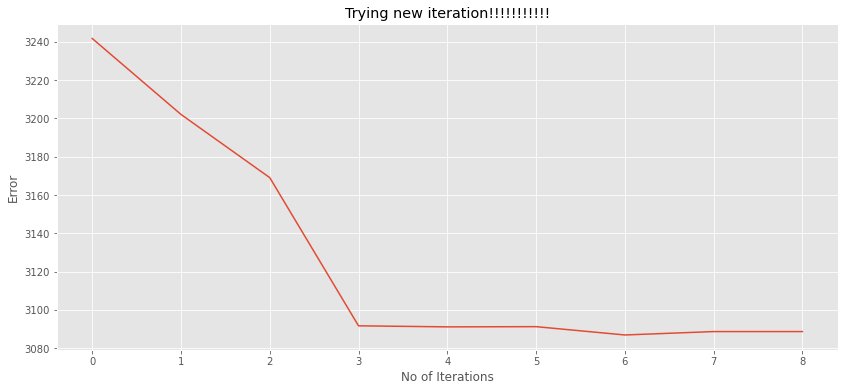

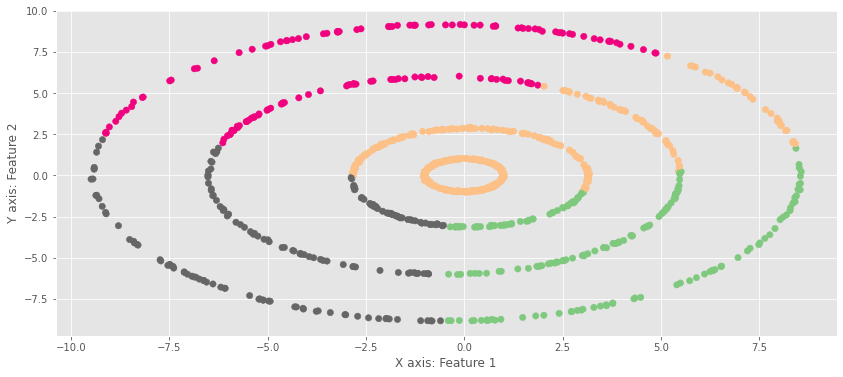

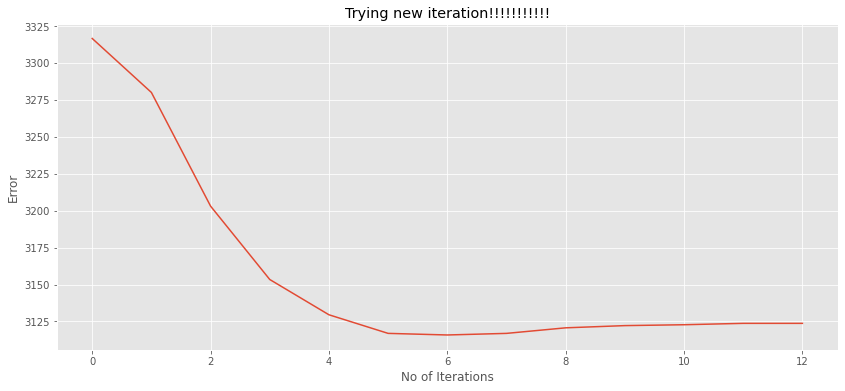

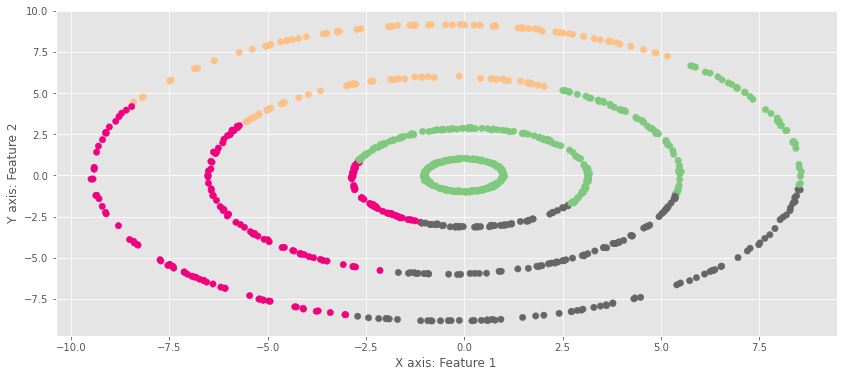

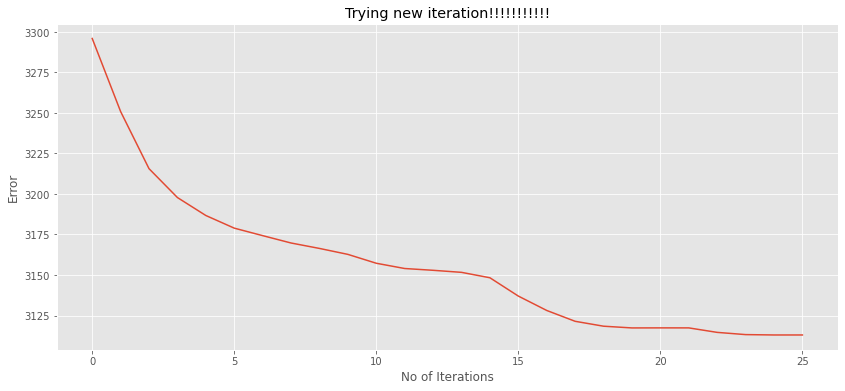

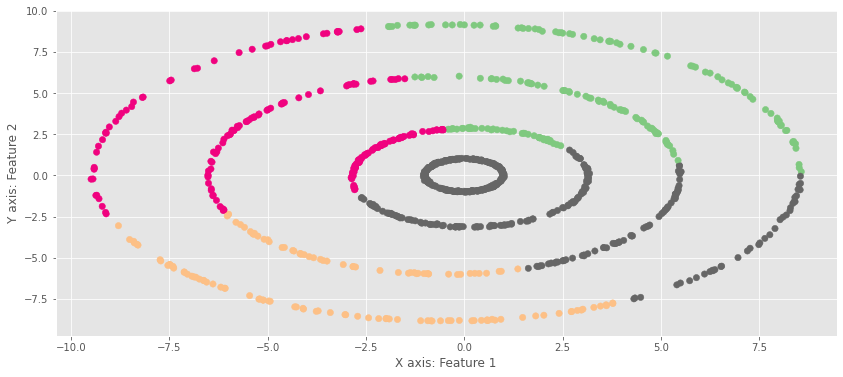

In [36]:
save_X = X
seed = [1, 2, 3, 4, 5]
for i in seed:
    centroids = centroid_initialization(X, n_clusters, i)
    current_clusters = cluster_assignment(X , centroids, n_clusters)
    update_centroids(X , current_clusters, n_clusters)
    
    #Process takes lot of time to converge as n_iter increases. So lower value of n_iter is taken here.
    #Algorithm will converge within some 1000 iterations
    n_iter = 1000
    dist = np.empty((0,1000), int)
    z = np.empty((0,1000), int)
    y = np.empty((0,1000), int)
    
    centroids = centroid_initialization(X, n_clusters, i)
    for it in range(n_iter):
        clusters = cluster_assignment(X, centroids, n_clusters)
        previous_centroids = centroids.copy()
        centroids = update_centroids(X, clusters, n_clusters)
        y = calculate_error(X, centroids, n_clusters, y)
        diff = centroids - previous_centroids
        z = np.append(z, it)
                  
        if not diff.any():
            print("K-Means Converged")
            break   
 
    y_axis = y
    x_axis = z
     
    with plt.style.context(('ggplot')):
        plt.figure(figsize=(14, 6))
        plt.title("Trying new iteration!!!!!!!!!!!")
        plt.xlabel("No of Iterations")
        #Distance between 2 current and previous centroid
        plt.ylabel("Error")
        plt.plot(x_axis, y_axis)
        
        
    #Assigning clusters_ids to all data points
    with plt.style.context(('ggplot')):
        plt.figure(figsize=(14, 6))
        plt.xlabel("X axis: Feature 1")
        plt.ylabel("Y axis: Feature 2")
        y_pred = np.zeros(n_samples)
        for cluster_id, cluster in enumerate(clusters):
            for index in cluster:
                y_pred[index] = cluster_id
        plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=40, cmap= 'Accent')